<a href="https://colab.research.google.com/github/yugant10-commits/DS101/blob/master/Exploratory_Data_Analysis_on_Nepals_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan to Nepal by the World Bank

The International Development Association (IDA) credits are public and publicly guaranteed debt extended by the World Bank Group. This dataset contains the loan that was borrowed by the Ministry of Finance of Nepal. These loans are all taken to fund national level projects. Furthermore, these help us understand the direction, in terms of development of infrastructure, the country is headed to throughout the years.

This whole project is uploaded here:  https://github.com/yugant10-commits/DS101

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from typing import List
import seaborn as sns
style.use('fivethirtyeight')

## Dataset Loading

Details about the columns : https://finances.worldbank.org/Loans-and-Credits/nepal-data/2uex-89k7

I have gone ahead and preprocessed the data already and uploaded it on github. 

In [2]:
!wget https://raw.githubusercontent.com/yugant10-commits/DS101/master/data/processed.csv

--2022-09-02 14:45:24--  https://raw.githubusercontent.com/yugant10-commits/DS101/master/data/processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30320 (30K) [text/plain]
Saving to: ‘processed.csv’

processed.csv       100%[===================>]  29.61K  --.-KB/s    in 0.002s  

2022-09-02 14:45:24 (14.3 MB/s) - ‘processed.csv’ saved [30320/30320]



In [3]:
dataset = pd.read_csv('processed.csv')
df = dataset.copy()
df.head()

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent)
0,Fully Repaid,0.75,USD,P010061,TELECOMMUNICATIONS,1781585.2,6297.39,1775287.81,1775287.81,0.00,0.00,2019-03-15,1969-11-10,1969-11-04,1970-02-26,1976-09-30
1,Fully Repaid,0.75,USD,P010069,HIGHWAYS I,2511997.8,342913.51,2169084.29,2169084.29,0.00,0.00,2020-09-15,1970-12-21,1970-11-10,1971-02-03,1977-06-30
2,Repaying,0.75,USD,P010070,TOURISM/NIDC,4200000.0,1002085.80,3197914.20,3101976.78,95937.42,95937.42,2022-02-01,1972-03-22,1972-03-14,1972-11-09,1977-12-31
3,Repaying,0.75,USD,P010072,IRRIGATION BIRGANJ I,6000000.0,41087.69,5958912.31,5690660.00,268252.31,268252.31,2022-11-01,1973-04-18,1973-03-20,1973-07-09,1981-06-30
4,Repaying,0.75,USD,P010074,TELECOMMUNICATIONS I,5500000.0,0.00,5500000.00,5170000.00,330000.00,330000.00,2023-03-15,1973-06-20,1973-04-26,1973-09-11,1982-12-31


## Dataframe statistics

In [4]:
len(df)

183

In [5]:
df.describe()

,ServiceChargeRate,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld
count,140.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,0.744643,4.477414e+07,3.846074e+06,3.246078e+07,5.144812e+06,2.147006e+07,3.035208e+07
std,0.063387,5.047405e+07,7.656747e+06,4.078643e+07,9.392750e+06,4.174464e+07,5.445655e+07
min,0.000000,1.781585e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.750000,1.400000e+07,0.000000e+00,7.774538e+06,0.000000e+00,0.000000e+00,3.889623e+05
50%,0.750000,2.670000e+07,4.001277e+05,1.700000e+07,4.909742e+04,4.312729e+06,6.300000e+06
75%,0.750000,6.000000e+07,3.665529e+06,4.639086e+07,6.742483e+06,2.097123e+07,2.931293e+07
max,0.750000,3.000000e+08,4.575799e+07,2.742648e+08,6.728502e+07,2.816945e+08,3.132418e+08


3.0e+08 =3 * (10**8) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CreditStatus               183 non-null    object 
 1   ServiceChargeRate          140 non-null    float64
 2   CurrencyofCommitment       183 non-null    object 
 3   ProjectID                  183 non-null    object 
 4   ProjectName                183 non-null    object 
 5   OriginalPrincipalAmount    183 non-null    float64
 6   CancelledAmount            183 non-null    float64
 7   DisbursedAmount            183 non-null    float64
 8   RepaidtoIDA                183 non-null    float64
 9   DuetoIDA                   183 non-null    float64
 10  CreditsHeld                183 non-null    float64
 11  LastRepaymentDate          142 non-null    object 
 12  AgreementSigningDate       181 non-null    object 
 13  BoardApprovalDate          183 non-null    object 

In [7]:
def convert_to_date(
    df: pd.DataFrame, 
    date_columns: List 
    )->pd.DataFrame:
    df[date_columns] = df[date_columns].astype("datetime64")
    return df

In [8]:
date_columns = ['BoardApprovalDate', 'ClosedDate(MostRecent)',
                'AgreementSigningDate', 'EffectiveDate(MostRecent)', 
                'LastRepaymentDate']
                
df = df.pipe(convert_to_date,date_columns)

## Dealing with null values

In [9]:
df.isna().sum()

CreditStatus                  0
ServiceChargeRate            43
CurrencyofCommitment          0
ProjectID                     0
ProjectName                   0
OriginalPrincipalAmount       0
CancelledAmount               0
DisbursedAmount               0
RepaidtoIDA                   0
DuetoIDA                      0
CreditsHeld                   0
LastRepaymentDate            41
AgreementSigningDate          2
BoardApprovalDate             0
EffectiveDate(MostRecent)     2
ClosedDate(MostRecent)        0
dtype: int64

In [10]:
len(df[df['ServiceChargeRate']==0.75])

139

Filling the empty values with the appropriate values

In [11]:
df['ServiceChargeRate'] = df['ServiceChargeRate'].fillna(0.75)

In [12]:
df.isna().sum()

CreditStatus                  0
ServiceChargeRate             0
CurrencyofCommitment          0
ProjectID                     0
ProjectName                   0
OriginalPrincipalAmount       0
CancelledAmount               0
DisbursedAmount               0
RepaidtoIDA                   0
DuetoIDA                      0
CreditsHeld                   0
LastRepaymentDate            41
AgreementSigningDate          2
BoardApprovalDate             0
EffectiveDate(MostRecent)     2
ClosedDate(MostRecent)        0
dtype: int64

Forward Fill and Backward fill in pandas
- can fill the not available values from the last available value, and vice versa.
- assuming that the data close to each other will be the same. 

In [13]:
columns_to_fill = ['EffectiveDate(MostRecent)', 'AgreementSigningDate']

In [14]:
df[columns_to_fill]

,EffectiveDate(MostRecent),AgreementSigningDate
0,1970-02-26,1969-11-10
1,1971-02-03,1970-12-21
2,1972-11-09,1972-03-22
3,1973-07-09,1973-04-18
4,1973-09-11,1973-06-20
...,...,...
178,2013-09-10,2013-07-11
179,2014-04-02,2014-03-24
180,2016-06-20,2014-11-24
181,2014-04-10,2014-03-24


In [15]:
df[columns_to_fill] = df[columns_to_fill].fillna(method="ffill")

In [16]:
df.isna().sum()

CreditStatus                  0
ServiceChargeRate             0
CurrencyofCommitment          0
ProjectID                     0
ProjectName                   0
OriginalPrincipalAmount       0
CancelledAmount               0
DisbursedAmount               0
RepaidtoIDA                   0
DuetoIDA                      0
CreditsHeld                   0
LastRepaymentDate            41
AgreementSigningDate          0
BoardApprovalDate             0
EffectiveDate(MostRecent)     0
ClosedDate(MostRecent)        0
dtype: int64

## Investigating how long the agreement signing takes

This will let us check how long it takes for Board to approve the Agreements after signing the agreement.


In [17]:
time_taken_for_agreement = df['AgreementSigningDate']- df['BoardApprovalDate']
df['TimeforAgreement'] = time_taken_for_agreement

In [18]:
df['TimeforAgreement'].describe()

count                           183
mean     68 days 04:35:24.590163934
std      56 days 02:41:12.633304764
min              -70 days +00:00:00
25%                34 days 00:00:00
50%                56 days 00:00:00
75%                91 days 00:00:00
max               496 days 00:00:00
Name: TimeforAgreement, dtype: object

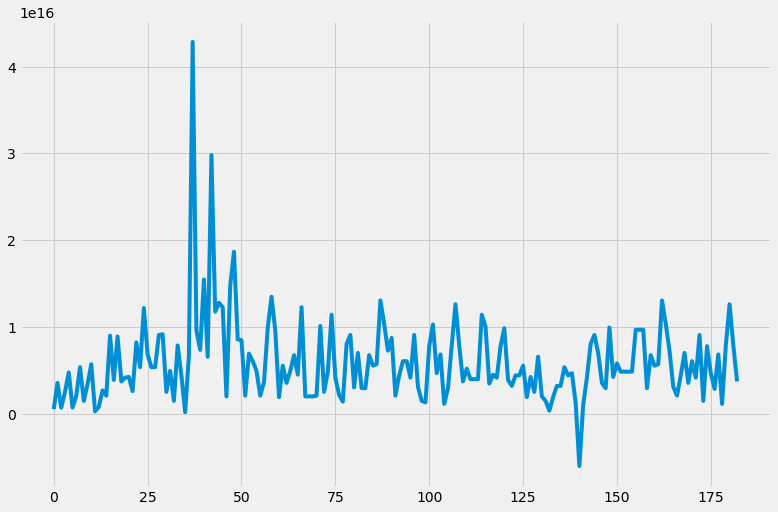

In [19]:
df['TimeforAgreement'].plot(figsize= (12,8))

### Checking out the anamolies.

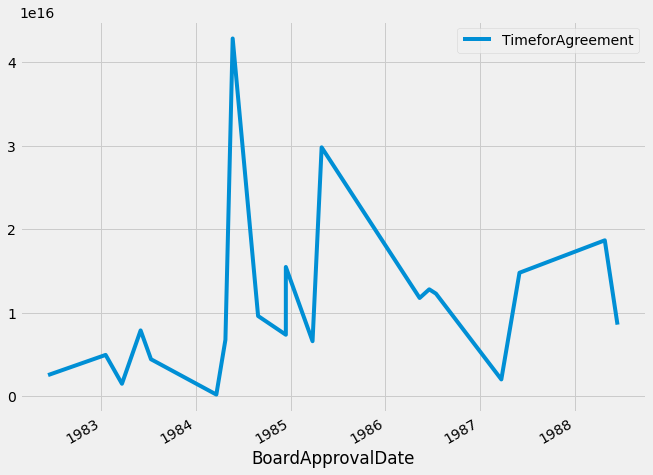

In [20]:
anomolies = df[30:50]
anomolies.plot.line(x='BoardApprovalDate', y='TimeforAgreement',  figsize = (10,8))

## How much time does the World usually allocate to withdraw loans?

In [21]:
time_to_withdraw_loans = df['ClosedDate(MostRecent)']-df['EffectiveDate(MostRecent)']

df['TimeforLoan'] = time_to_withdraw_loans
df['TimeforLoan'].describe()


count                             183
mean     2074 days 21:46:13.770491808
std       821 days 00:57:19.628141192
min                  92 days 00:00:00
25%                1557 days 00:00:00
50%                2054 days 00:00:00
75%                2679 days 00:00:00
max                3699 days 00:00:00
Name: TimeforLoan, dtype: object

###Checking out the anamolies

In [22]:
df[df['TimeforLoan']==df['TimeforLoan'].max()]

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
54,Repaying,0.75,XDR,P010333,CLOSED(T) ENGINEERING EDUCATION,11400000.0,21472.46,12255705.03,8683813.86,4008948.8,4008948.8,2029-04-15,1989-08-18,1989-06-22,1989-11-14,1999-12-31,57 days,3699 days


In [23]:
df[df['TimeforLoan']==df['TimeforLoan'].min()]

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
112,Fully Disbursed,0.75,XDR,P133777,NP: Financial sector stability DPC2,100000000.0,0.0,99422640.0,0.0,102702240.0,102702240.0,2053-06-15,2015-08-14,2015-06-29,2015-09-30,2015-12-31,46 days,92 days


###Plotting to see the trend

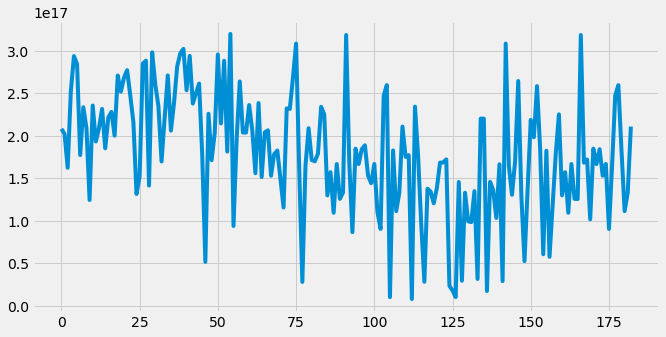

In [24]:
df['TimeforLoan'].plot(figsize=(10, 5))

## Checking Correlation
My hypothesis was that there could be some kind of relationship between Time for loan, time for agreement and the original principal amount

In [25]:
from scipy.stats import pearsonr, spearmanr

corr, _ = pearsonr(df['TimeforLoan'].dt.days,
                   df['TimeforAgreement'].dt.days)
print(f"correlation check for time for Loan and Agreement by Pearson: {corr}")
corr1, _ = spearmanr(df['TimeforLoan'].dt.days,
                   df['OriginalPrincipalAmount'])
print(f"correlation for time for loan and Amount check by Spearmanr: {corr1}")

correlation check for time for Loan and Agreement by Pearson: 0.11372364847103306
correlation for time for loan and Amount check by Spearmanr: -0.3228340121197277


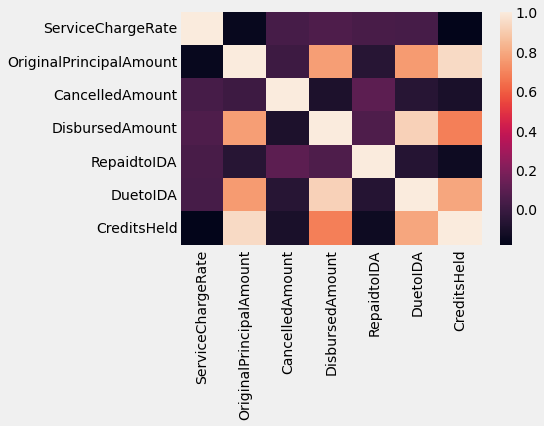

In [26]:
sns.heatmap(df.corr())

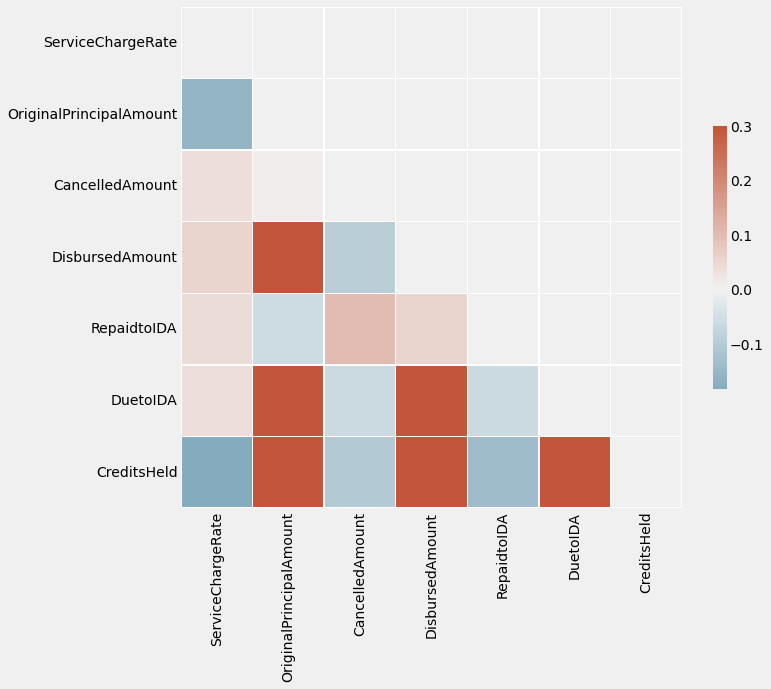

In [27]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Checking for anamolies in the Original Principal Amount.

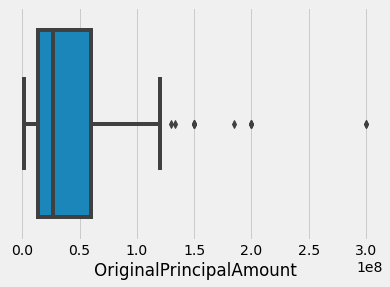

In [28]:
sns.boxplot(x = df['OriginalPrincipalAmount'])

In [29]:
factor = 3
upper_lim = df['OriginalPrincipalAmount'].mean () +df['OriginalPrincipalAmount'].std () * factor
lower_lim = df['OriginalPrincipalAmount'].mean () -df['OriginalPrincipalAmount'].std () * factor

df[(df['OriginalPrincipalAmount'] > upper_lim) | (df['OriginalPrincipalAmount'] < lower_lim)]

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
113,Disbursing,0.75,XDR,P155969,Earthquake Housing Reconst Project,200000000.0,0.0,1.997042e+08,0.0,2.027989e+08,205261838.0,2053-06-15,2015-08-14,2015-06-29,2016-01-28,2023-06-30,46 days,2710 days
122,Disbursing,0.75,XDR,P155969,Earthquake Housing Reconst Project,300000000.0,0.0,2.742648e+08,0.0,2.816945e+08,304683312.0,2055-12-01,2018-01-21,2017-12-15,2018-02-26,2023-06-30,37 days,1950 days
124,Fully Disbursed,0.75,XDR,P160792,Nepal Fiscal Reforms DPC,200000000.0,0.0,1.948644e+08,0.0,1.958475e+08,195847466.0,2056-03-15,2018-05-10,2018-03-20,2018-05-31,2019-02-28,51 days,273 days
130,Disbursing,0.75,XDR,P155969,Earthquake Housing Reconst Project,200000000.0,0.0,1.035235e+08,0.0,1.041430e+08,206830900.0,2057-12-01,2020-02-06,2020-01-14,2020-05-06,2023-06-30,23 days,1150 days
134,Effective,0.75,XDR,P170409,Strategic Road and Trade Improvement,300000000.0,0.0,0.000000e+00,0.0,0.000000e+00,313241832.0,2058-03-01,2020-07-17,2020-06-10,2020-07-24,2027-07-15,37 days,2547 days
136,Disbursing,0.75,XDR,P173044,Finance for Growth (F4G),200000000.0,0.0,2.107058e+08,0.0,2.079720e+08,207972036.0,2058-09-15,2020-11-18,2020-09-17,2020-12-11,2021-06-30,62 days,201 days


## Investigating Currency

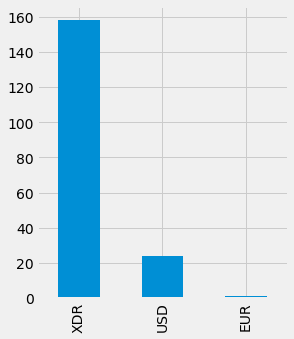

In [30]:
df['CurrencyofCommitment'].value_counts().plot(kind='bar', figsize=(4, 5))

In [31]:
df[df['CurrencyofCommitment']=='EUR']

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
135,Disbursing,0.0,EUR,P170409,Strategic Road and Trade Improvement,150000000.0,0.0,399613.5,0.0,410170.5,164068200.0,2050-03-01,2020-07-17,2020-06-10,2020-07-24,2027-07-15,37 days,2547 days


In [32]:
df[df['CurrencyofCommitment']=='USD'].AgreementSigningDate

0    1969-11-10
1    1970-12-21
2    1972-03-22
3    1973-04-18
4    1973-06-20
5    1974-05-08
6    1977-05-27
7    1974-08-14
8    1976-01-09
9    1979-06-18
10   1976-04-30
11   1976-07-09
12   1976-09-16
13   1977-05-27
14   1977-05-27
15   1977-10-19
16   1978-04-14
17   1978-08-22
18   1978-07-07
19   1978-11-27
20   1979-08-09
21   1980-05-22
22   1980-09-29
23   1980-09-29
Name: AgreementSigningDate, dtype: datetime64[ns]

##Checking the credit status of the loans.

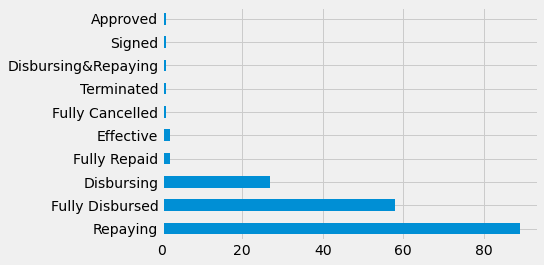

In [33]:
for_plot = df['CreditStatus'].value_counts()
group_credit = df.groupby(df['CreditStatus'])
for_plot.plot(kind='barh')

##Checking out sectors of investment.

In [34]:
electric = df['ProjectName'].str.contains(
    'elect',case=False)
electricity_df = df[electric]
electricity_df.AgreementSigningDate

91    2011-07-15
103   2013-09-11
107   2014-11-24
166   2011-07-15
177   2013-09-11
180   2014-11-24
Name: AgreementSigningDate, dtype: datetime64[ns]

In [35]:
education = df['ProjectName'].str.contains(
    'education',case=False)
edu_df = df[education]
edu_df.AgreementSigningDate

16    1978-04-14
29    1982-04-07
54    1989-08-18
60    1992-05-13
63    1994-02-16
70    1999-04-23
80    2004-08-12
111   2015-04-06
150   2007-04-30
154   2008-01-31
Name: AgreementSigningDate, dtype: datetime64[ns]

## Loans according the context of the country.
The year before 2007, Nepal was ruled by a king. 

In [36]:
king_time = df['BoardApprovalDate'].dt.year<2007
king_pd = df[king_time]
max_loan = king_pd[king_pd['OriginalPrincipalAmount'] 
         ==king_pd['OriginalPrincipalAmount'].max()]
max_loan

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
37,Repaying,0.75,XDR,P010200,POWER II (MARSYANGDI,107000000.0,26897743.56,98642463.43,67285016.82,41818847.88,41818847.88,2034-04-15,1985-09-30,1984-05-22,1986-01-29,1994-12-31,496 days,3258 days


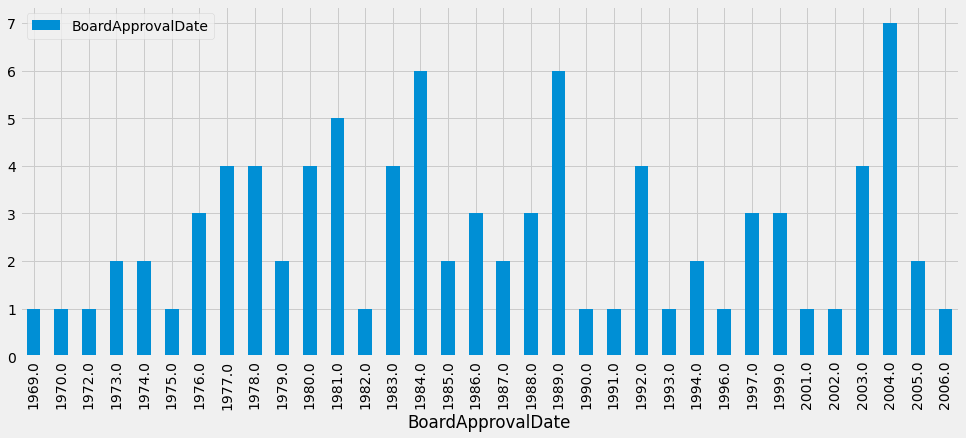

In [37]:
selected = df[["BoardApprovalDate"]]
selected.groupby(king_pd["BoardApprovalDate"].dt.year).count().plot(kind="bar", figsize=(15,6))

Since 2004 was the year where loans were taken the most. 

A deeper dive into the year.

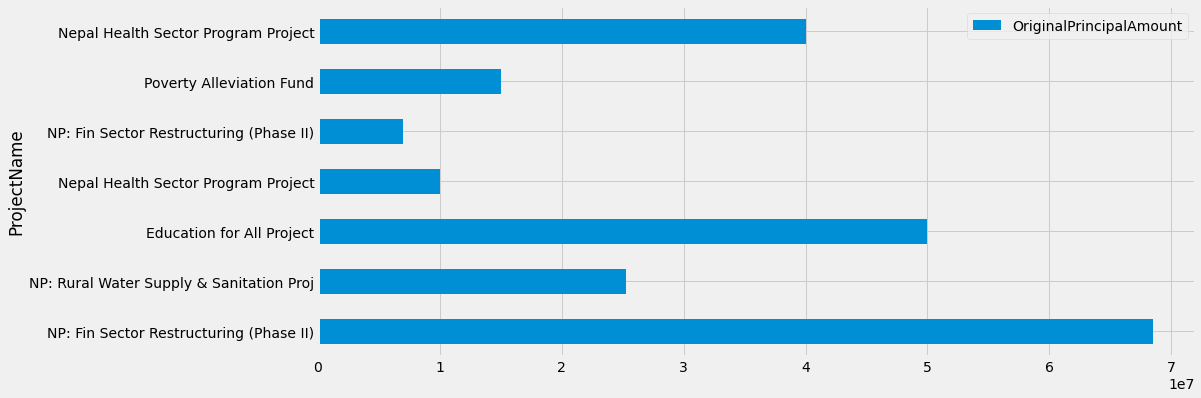

In [38]:
mask_2004 = df['BoardApprovalDate'].dt.year==2004
selected_cols = df[['ProjectName','OriginalPrincipalAmount']]
for_plot_2004 = selected_cols[mask_2004]
for_plot_2004.set_index('ProjectName', inplace=True)
for_plot_2004.plot(kind='barh', figsize = (14,6))


###Democracy

####Maximum loan
Checking out the maximum loan taken after democracy arrived.

In [39]:
after_king_time = df['BoardApprovalDate'].dt.year > 2007
after_king = df[after_king_time]
after_king['OriginalPrincipalAmount'].sum()
max_after = after_king[after_king['OriginalPrincipalAmount'] 
         ==after_king['OriginalPrincipalAmount'].max()]
max_after

,CreditStatus,ServiceChargeRate,CurrencyofCommitment,ProjectID,ProjectName,OriginalPrincipalAmount,CancelledAmount,DisbursedAmount,RepaidtoIDA,DuetoIDA,CreditsHeld,LastRepaymentDate,AgreementSigningDate,BoardApprovalDate,EffectiveDate(MostRecent),ClosedDate(MostRecent),TimeforAgreement,TimeforLoan
122,Disbursing,0.75,XDR,P155969,Earthquake Housing Reconst Project,300000000.0,0.0,2.742648e+08,0.0,2.816945e+08,304683312.0,2055-12-01,2018-01-21,2017-12-15,2018-02-26,2023-06-30,37 days,1950 days
134,Effective,0.75,XDR,P170409,Strategic Road and Trade Improvement,300000000.0,0.0,0.000000e+00,0.0,0.000000e+00,313241832.0,2058-03-01,2020-07-17,2020-06-10,2020-07-24,2027-07-15,37 days,2547 days


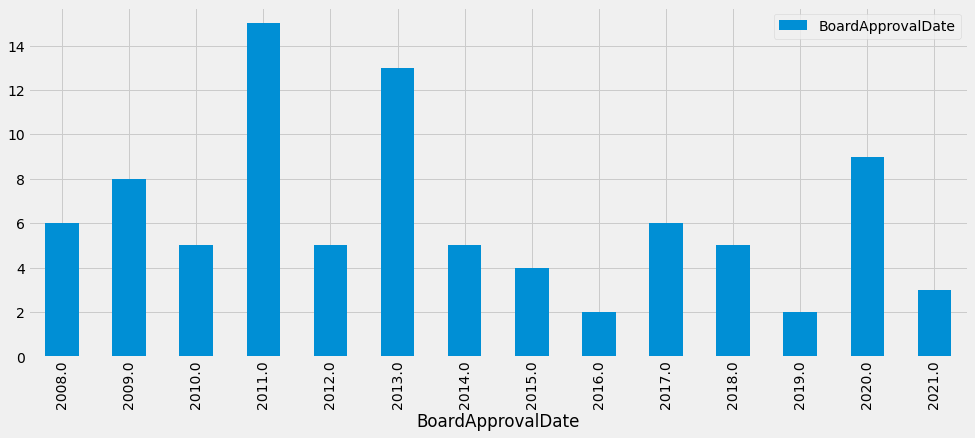

In [40]:
selected.groupby(after_king["BoardApprovalDate"].dt.year).count().plot(kind="bar", figsize=(15,6))

Since, 2011 had the most number of loans, taking a deeper look at sectors the loans were invested in.

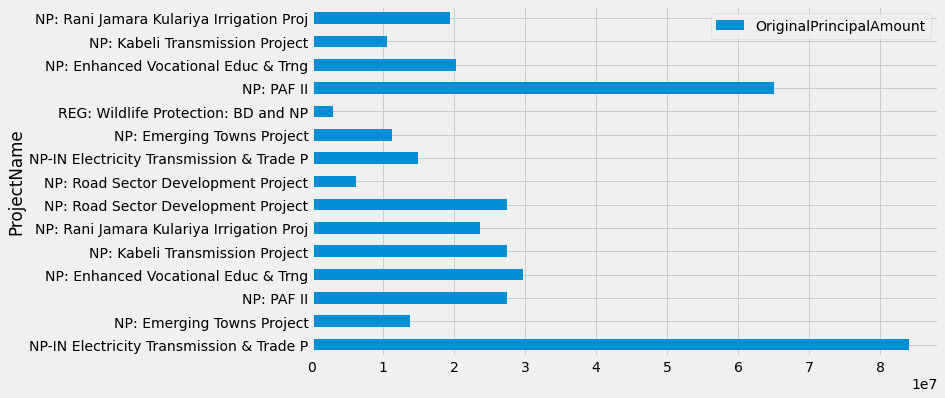

In [41]:
mask_2011 = df['BoardApprovalDate'].dt.year == 2011
selected_cols = df[['ProjectName','OriginalPrincipalAmount']]
for_plot_2011 = selected_cols[mask_2011]
for_plot_2011.set_index('ProjectName', inplace=True)
for_plot_2011.plot(kind='barh', figsize= (10, 6))

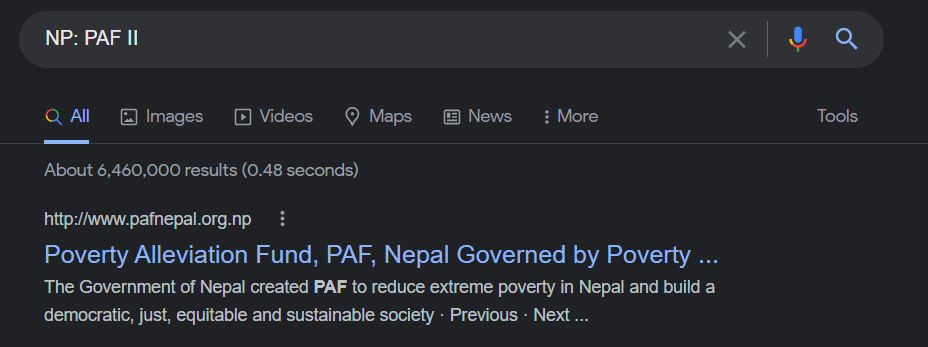



> Hope this was worth your time! Hope this ignites the Data Scientist in you.  

